spatial.catalyst-team/tutorials/sparrow_notebook/sdata_vib_compute_example.zarr/.zgroup
spatial.catalyst-team/tutorials/sparrow_notebook/sdata_vib_compute_example.zarr/images
spatial.catalyst-team/tutorials/sparrow_notebook/sdata_vib_compute_example.zarr/points
spatial.catalyst-team/tutorials/sparrow_notebook/sdata_vib_compute_example.zarr/zmetadata


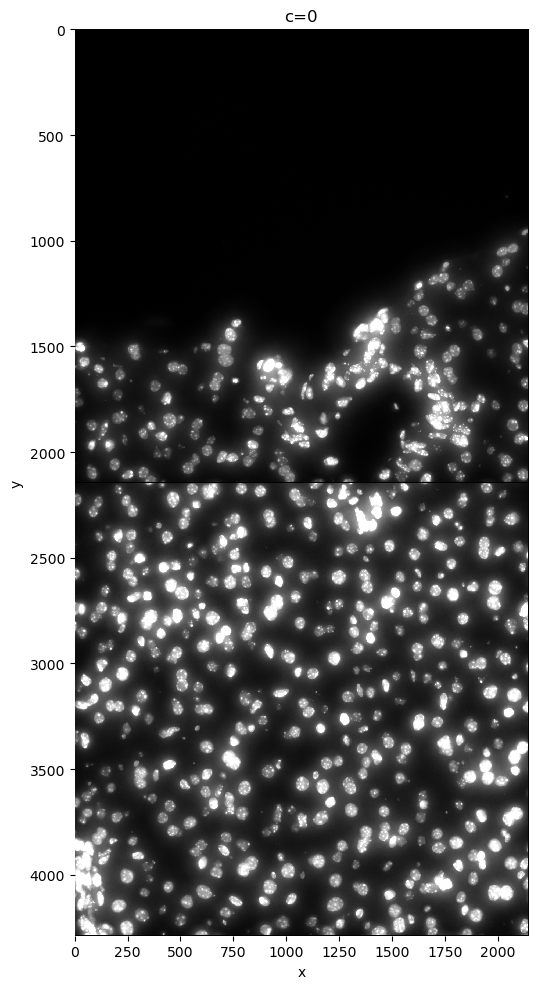

In [2]:
import os

import s3fs
import zarr
from dotenv import load_dotenv
from spatialdata import read_zarr

import sparrow as sp

load_dotenv()

# copied to object store via:
# mc cp -r sdata_vib_compute_example.zarr ObjectStorage/spatial.catalyst-team/tutorials/sparrow_notebook

s3_endpoint_url = "https://objectstor.vib.be"

OUTPUT_DIR = "/home/VIB.LOCAL/arne.defauw/DATA/resolve_data_liver/"

access_key = os.environ.get("ACCESS_KEY")
secret_key = os.environ.get("SECRET_KEY")

# Create an S3 filesystem object
s3 = s3fs.S3FileSystem(anon=False, key=access_key, secret=secret_key, client_kwargs={"endpoint_url": s3_endpoint_url})

bucket_name = "spatial.catalyst-team"
zarr_store_path = "tutorials/sparrow_notebook/sdata_vib_compute_example.zarr"

# Complete S3 path
s3_path = f"{bucket_name}/{zarr_store_path}"

for path in s3.ls(s3_path):
    print(path)

# Open the Zarr store
store = s3fs.S3Map(root=s3_path, s3=s3)

zarr_group = zarr.open(store, mode="a")
sdata = read_zarr(store=zarr_group, selection=["images"])

sp.pl.plot_image(sdata, img_layer="raw_image")

In [3]:
sdata.write(os.path.join(OUTPUT_DIR, "sdata_backup.zarr"))

INFO     The Zarr file used for backing will now change from . to                                                  
         /home/VIB.LOCAL/arne.defauw/DATA/resolve_data_liver/sdata_backup.zarr                                     


We will now add an image layer to sdata (will be backed to sdata_backup.zarr )

In [4]:
import dask.array as da

arr = da.asarray(sdata["raw_image"].data.compute())
sdata = sp.im._add_image_layer(
    sdata,
    arr=arr,
    output_layer="raw_image_copy",
)

2024-03-21 10:23:16,738 - sparrow.image._manager - WARNING - No dims parameter specified. Assuming order of dimension of provided array is (c, (z), y, x)
2024-03-21 10:23:16,738 - sparrow.image._manager - WARNING - No dims parameter specified. Assuming order of dimension of provided array is (c, (z), y, x)
2024-03-21 10:23:16,749 - sparrow.image._manager - INFO - Writing results to layer 'raw_image_copy'
2024-03-21 10:23:16,749 - sparrow.image._manager - INFO - Writing results to layer 'raw_image_copy'


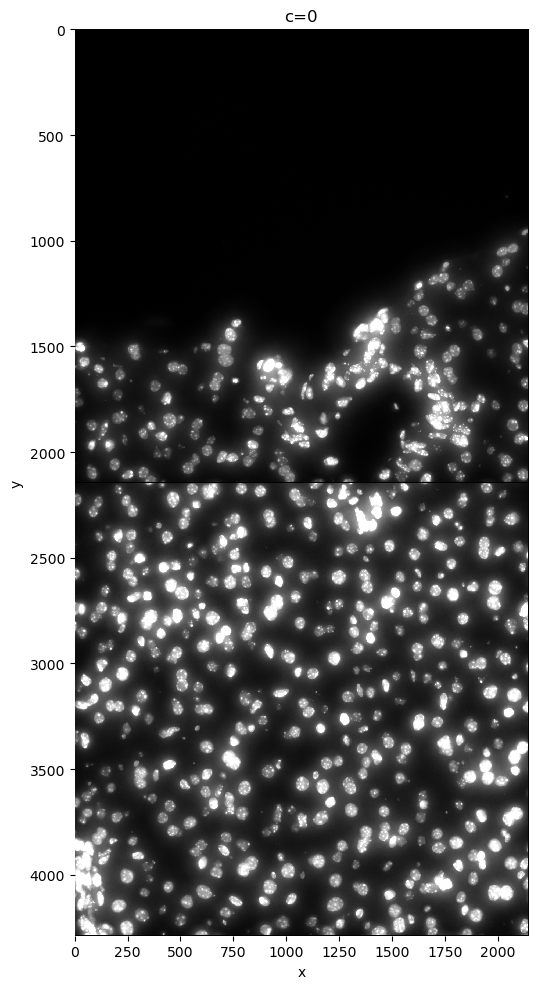

In [5]:
sp.pl.plot_image(sdata, img_layer="raw_image_copy")

In [6]:
sdata.path

PosixPath('/home/VIB.LOCAL/arne.defauw/DATA/resolve_data_liver/sdata_backup.zarr')

In [7]:
sdata

SpatialData object with:
└── Images
      ├── 'raw_image': SpatialImage[cyx] (1, 4288, 2144)
      └── 'raw_image_copy': SpatialImage[cyx] (1, 4288, 2144)
with coordinate systems:
▸ 'global', with elements:
        raw_image (Images), raw_image_copy (Images)